In [367]:
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import randint, uniform
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def load_dataset(file_name):
    # Load the CSV file into a DataFrame
    df = pd.read_csv(file_name)
    return df

d_train=load_dataset('./wine_train.csv')
d_test=load_dataset('./wine_test.csv')

print("First 5 rows of the training dataset:")
d_train.head(5)


First 5 rows of the training dataset:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


In [368]:
print("First 5 rows of the testing dataset:")
d_test.head(5)

First 5 rows of the testing dataset:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


In [369]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       142 non-null    float64
 1   malic_acid                    142 non-null    float64
 2   ash                           142 non-null    float64
 3   alcalinity_of_ash             142 non-null    float64
 4   magnesium                     142 non-null    float64
 5   total_phenols                 142 non-null    float64
 6   flavanoids                    142 non-null    float64
 7   nonflavanoid_phenols          142 non-null    float64
 8   proanthocyanins               142 non-null    float64
 9   color_intensity               142 non-null    float64
 10  hue                           142 non-null    float64
 11  od280/od315_of_diluted_wines  142 non-null    float64
 12  proline                       142 non-null    float64
 13  targe

In [370]:
d_train.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746,0.922535
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905,0.772524
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000,0.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000,0.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000,1.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000,2.000000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000,2.000000


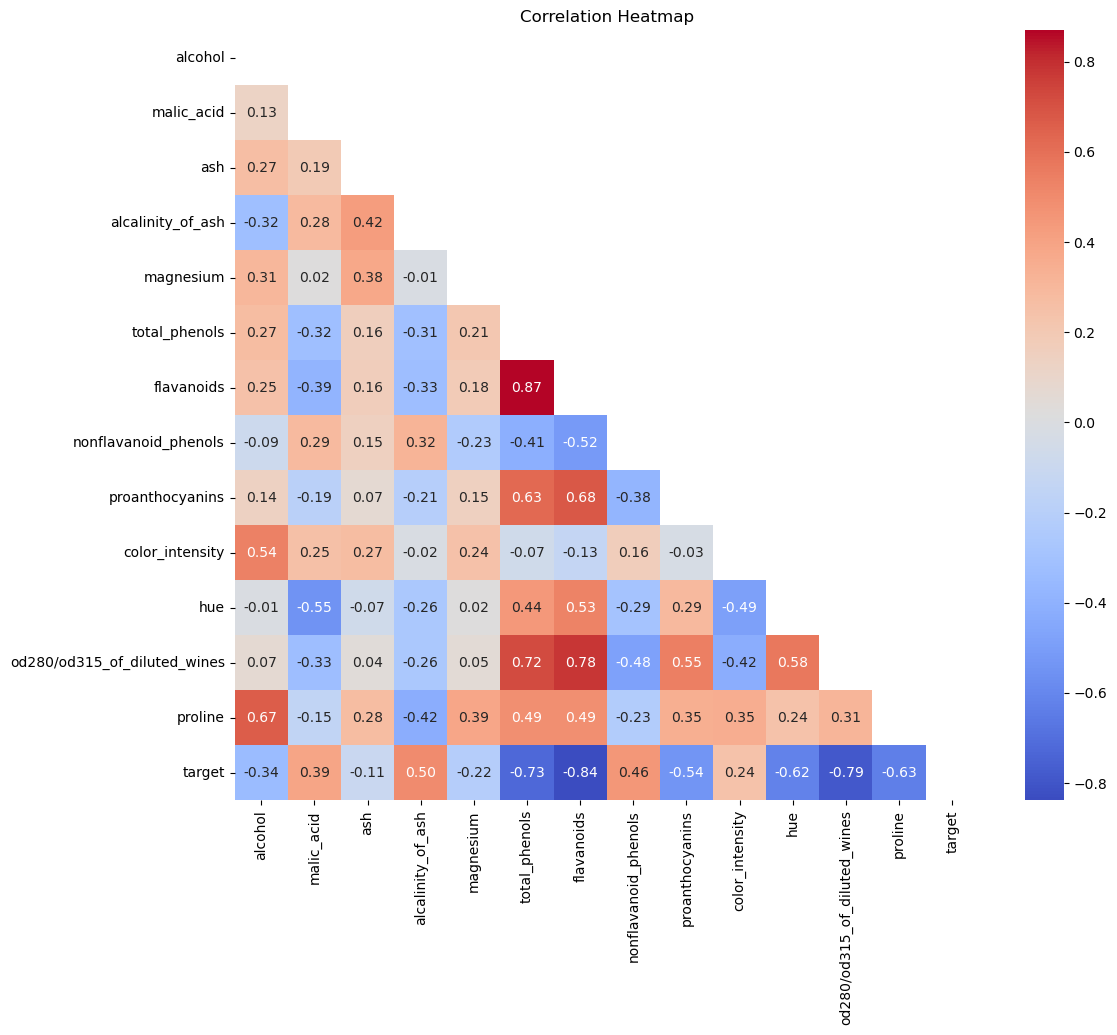

In [371]:
corr_matrix = d_train.corr()


# Plotting the heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=np.triu(corr_matrix), cbar=True, 
                      xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
heatmap.set_title('Correlation Heatmap')
plt.xticks(rotation=90)
plt.show()

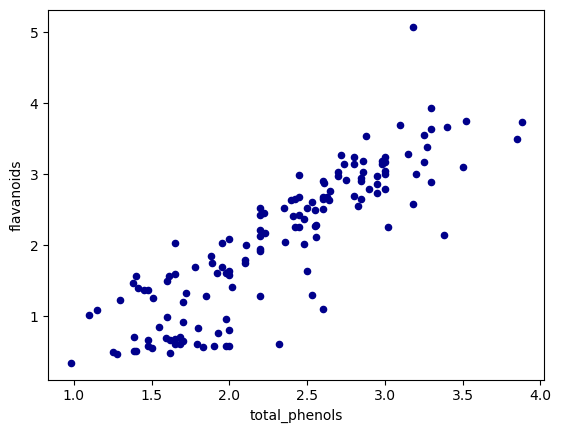

In [372]:
# Generate the scatter plot matrix
ax1 = d_train.plot.scatter(x='total_phenols',y='flavanoids', c='DarkBlue')


In [373]:
#Feture engineering 1:

#return coloumn with min std
#explaining: we know that variance=std^2, so if std limit to 0 the variance even more limit to 0.
def getMinCol(df):
    #drop coloumn with variance close to 0
    min_col_name = df.describe().loc["std"].idxmin()
    return min_col_name



def drop_coloumns(df, min_col_name):
    #drop coloumn with high correlation
    df.drop('total_phenols', axis='columns',inplace=True)
    
    #drop coloumn with variance close to 0
    df.drop(min_col_name, axis='columns',inplace=True)
    
    #drop coloumn with low variance and low correlation with target value
    df.drop('ash', axis='columns',inplace=True)
    
min_col_name = getMinCol(d_train)
drop_coloumns(d_train,min_col_name)
drop_coloumns(d_test,min_col_name)


#--------------------------------------------------------------------------------------------

In [374]:
# Define the KNN model
knn_model = KNeighborsClassifier(algorithm='brute')  # Set algorithm to 'brute'

# Define the SVM model (unchanged)
svc_model = SVC(random_state=42)

# Define the parameter grid for KNN including n_neighbors, metric, and weights
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],  # Distance metrics
    'weights': ['uniform', 'distance']  # Weighting functions
}

# Define the parameter grid for SVM (unchanged)
svc_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Separate features and target in original (not scaled)
X_train = d_train.drop(columns='target')
y_train = d_train['target']
X_test = d_test.drop(columns='target')
y_test = d_test['target']


#Feture engineering 2:

# Scaling the DS in values 0->1.

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#--------------------------------------------
scaler_S = StandardScaler()

X_train_S = scaler.fit_transform(X_train)
X_test_S = scaler.fit_transform(X_test)


In [375]:
# Perform grid search with 5-fold cross-validation
#MinMax Scaler
knn_grid_search = GridSearchCV(estimator=knn_model, param_grid=knn_params, cv=5, scoring='f1_macro')
svc_grid_search = GridSearchCV(estimator=svc_model, param_grid=svc_params, cv=5, scoring='f1_macro')
#Standard Scaler
knn_grid_search_S = GridSearchCV(estimator=knn_model, param_grid=knn_params, cv=5, scoring='f1_macro')
svc_grid_search_S = GridSearchCV(estimator=svc_model, param_grid=svc_params, cv=5, scoring='f1_macro')

#---------------------------------------
#MinMax version of DF
#  Fit the models
knn_grid_search.fit(X_train, y_train)
svc_grid_search.fit(X_train, y_train)

# # Get the best models and their parameters
best_knn_model = knn_grid_search.best_estimator_
best_svc_model = svc_grid_search.best_estimator_

# Evaluate the best models
knn_best_score = knn_grid_search.best_score_
svc_best_score = svc_grid_search.best_score_

#---------------------------------------
#StandardScaled version of DF
#  Fit the models
knn_grid_search_S.fit(X_train_S, y_train)
svc_grid_search_S.fit(X_train_S, y_train)

# # Get the best models and their parameters
best_knn_model_S = knn_grid_search_S.best_estimator_
best_svc_model_S = svc_grid_search_S.best_estimator_

# Evaluate the best models
knn_best_score_S = knn_grid_search_S.best_score_
svc_best_score_S = svc_grid_search_S.best_score_


#---------------------------------------
knn_results_MinMax = pd.DataFrame(knn_grid_search.cv_results_)
svc_results_MinMax = pd.DataFrame(svc_grid_search.cv_results_)

knn_results_S = pd.DataFrame(knn_grid_search_S.cv_results_)
svc_results_S = pd.DataFrame(svc_grid_search_S.cv_results_)

#---------------------------------------

# Add a column to indicate if data was scaled
knn_results_MinMax['Scaling'] = 'MinMax'
svc_results_MinMax['Scaling'] = 'MinMax'
knn_results_S['Scaling'] = 'Standart_Scaled'
svc_results_S['Scaling'] = 'Standart_Scaled'

# Combine the results into one DataFrame for each model
knn_combined_results = pd.concat([knn_results_MinMax, knn_results_S], ignore_index=True)
svc_combined_results = pd.concat([svc_results_MinMax, svc_results_S], ignore_index=True)

# Select relevant columns for comparison
knn_combined_results = knn_combined_results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score', 'Scaling']]
svc_combined_results = svc_combined_results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score', 'Scaling']]

# Rename columns for clarity
knn_combined_results.rename(columns={'mean_test_score': 'F1 Macro Score', 'std_test_score': 'F1 Score StdDev', 'rank_test_score': 'Rank'}, inplace=True)
svc_combined_results.rename(columns={'mean_test_score': 'F1 Macro Score', 'std_test_score': 'F1 Score StdDev', 'rank_test_score': 'Rank'}, inplace=True)

# Add a column to indicate the model
knn_combined_results['Model'] = 'KNN'
svc_combined_results['Model'] = 'SVC'

# Combine results for both models
all_results = pd.concat([knn_combined_results, svc_combined_results], ignore_index=True)

# Display the DataFrame
all_results_sorted = all_results.sort_values(by=['Rank', 'Model']).reset_index(drop=True)


In [376]:
pd.set_option('display.max_colwidth', None)
def highlight_first_row(row):
    color = 'background-color: yellow'
    return [color if row.name == 0 else '' for _ in row]

styled_df = all_results_sorted.style.apply(highlight_first_row, axis=1)
styled_df

,params,F1 Macro Score,F1 Score StdDev,Rank,Scaling,Model
0,"{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}",0.986320,0.027359,1,MinMax,KNN
1,"{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}",0.986320,0.027359,1,MinMax,KNN
2,"{'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'uniform'}",0.986320,0.027359,1,MinMax,KNN
3,"{'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'distance'}",0.986320,0.027359,1,MinMax,KNN
4,"{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}",0.986320,0.027359,1,Standart_Scaled,KNN
5,"{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}",0.986320,0.027359,1,Standart_Scaled,KNN
6,"{'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'uniform'}",0.986320,0.027359,1,Standart_Scaled,KNN
7,"{'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'distance'}",0.986320,0.027359,1,Standart_Scaled,KNN
8,"{'C': 1, 'kernel': 'linear'}",0.979462,0.041076,1,MinMax,SVC
9,"{'C': 1, 'kernel': 'linear'}",0.979462,0.041076,1,Standart_Scaled,SVC


In [377]:

#---------------------------------------
# # Evaluate the best models
knn_best_score = knn_grid_search.best_score_
svc_best_score = svc_grid_search.best_score_

print("Best KNN MinMax F1 Macro Score:", knn_best_score)
print("Best SVC MinMax F1 Macro Score:", svc_best_score)
print("Best KNN stdS F1 Macro Score:", knn_best_score_S)
print("Best SVC stdS F1 Macro Score:", svc_best_score_S)

# # # Create a DataFrame to compare results
results = {
    'Model': ['KNN MinMax','SVC MinMax','KNN stdS','SVC stdS'],
    'Best Parameters': [knn_grid_search.best_params_, svc_grid_search.best_params_,knn_grid_search_S.best_params_, svc_grid_search_S.best_params_],
    'Best F1 Macro Score': [knn_best_score, svc_best_score,knn_best_score, svc_best_score]
}

results_df = pd.DataFrame(results)
results_df

Best KNN MinMax F1 Macro Score: 0.9863203463203462
Best SVC MinMax F1 Macro Score: 0.979462242562929
Best KNN stdS F1 Macro Score: 0.9863203463203462
Best SVC stdS F1 Macro Score: 0.979462242562929


,Model,Best Parameters,Best F1 Macro Score
0,KNN MinMax,"{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}",0.986320
1,SVC MinMax,"{'C': 1, 'kernel': 'linear'}",0.979462
2,KNN stdS,"{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}",0.986320
3,SVC stdS,"{'C': 1, 'kernel': 'linear'}",0.979462


In [378]:
# Define KNN with the best hyperparameters
knn = KNeighborsClassifier(metric='euclidean', n_neighbors=9, weights='uniform')
f1_macro_scorer = make_scorer(f1_score, average='macro')

# Perform cross-validation and compute F1-macro score
cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring=f1_macro_scorer)

# Train the model and make predictions
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Calculate F1-macro on test set
f1_macro_test = f1_score(y_test, y_pred, average='macro')

print ("after implementing the best algorithm and the best hyper params and the best scaling according to the train set ")
print (", to the test set , the pedictions are validated with F1-macro are:")
f1_macro_test

after implementing the best algorithm and the best hyper params and the best scaling according to the train set 
, to the test set , the pedictions are validated with F1-macro are:


0.9177294685990338